**Simple LSTM for text classification**

Dataset Link:

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['spam.csv']),delimiter=',',encoding='latin-1')
# print(df.head())

In [ ]:
import io
df = pd.read_csv("/content/spam.csv",delimiter=',',encoding='latin-1')
print(df.head())

     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
# Drop the columns that are not required for the neural network.
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


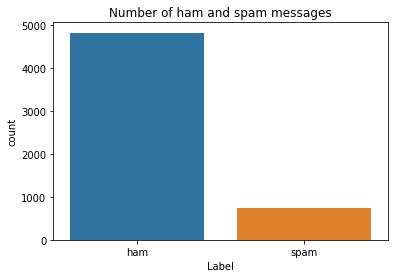

In [ ]:
# Understand the distribution better.
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages');

Create input and output vectors.

Process the labels.

In [ ]:
X = df.v2
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [ ]:
Y = df.v1
Y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Y.shape

(5572,)

In [ ]:
Y = Y.reshape(-1,1)
Y.shape

(5572, 1)

In [ ]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# Split into training and test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
X_train.shape

(4736,)

In [ ]:
Y_train.shape

(4736, 1)

In [ ]:
X_test.shape

(836,)

In [ ]:
Y_test.shape

(836, 1)

**Process the data**

Tokenize the data and convert the text to sequences.

Add padding to ensure that all the sequences have the same shape.

There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [ ]:
# Top 1000 frequently occurring words
max_words = 1000

# Define the sequence lengths, max number of words and embedding dimensions
# Sequence length of each sentence. If more, truncate. If less, pad with zeros
max_len = 150
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences


# https://keras.io/api/preprocessing/text/
# https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
tok

In [ ]:
# Temporary Cell

from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'good': 1, 'work': 2, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# Transforms each text in texts to a sequence of integers.
sequences = tok.texts_to_sequences(X_train)
sequences

[[332, 27, 576, 24, 21, 706, 55, 4, 340, 15],
 [1,
  54,
  24,
  3,
  78,
  2,
  35,
  21,
  1,
  37,
  55,
  11,
  24,
  1,
  142,
  2,
  8,
  2,
  410,
  12,
  10,
  2,
  59,
  2,
  113],
 [135, 99, 267, 387],
 [1, 105, 37, 606, 707, 182, 7, 85, 3, 607],
 [846,
  198,
  59,
  2,
  24,
  68,
  353,
  76,
  198,
  59,
  2,
  24,
  68,
  353,
  76,
  1,
  198,
  59,
  2,
  163,
  6,
  24,
  31,
  68,
  11,
  188,
  76,
  126,
  2,
  6,
  236],
 [216,
  37,
  671,
  48,
  20,
  39,
  17,
  2,
  189,
  11,
  672,
  44,
  46,
  5,
  20,
  436,
  23,
  93,
  105,
  77,
  30,
  74,
  48,
  27,
  50,
  39,
  152,
  268,
  2,
  47,
  48,
  73,
  15,
  847],
 [164, 1, 60, 23, 77, 247, 411],
 [35, 5, 33, 110],
 [52,
  487,
  9,
  19,
  4,
  746,
  974,
  2,
  178,
  608,
  262,
  70,
  2,
  2,
  315,
  487,
  524,
  906,
  75,
  388,
  179,
  708,
  422],
 [56, 171, 459, 16, 10, 341],
 [975, 77, 176, 3, 54, 45, 11, 248],
 [164, 848, 15, 4, 747],
 [82, 87, 169, 169, 82, 1, 60, 44, 36],
 [125, 131

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ...,   4, 340,  15],
       [  0,   0,   0, ...,  59,   2, 113],
       [  0,   0,   0, ...,  99, 267, 387],
       ...,
       [  0,   0,   0, ...,   5, 158,  35],
       [  0,   0,   0, ..., 303, 625, 513],
       [  0,   0,   0, ...,  66,   8, 559]], dtype=int32)

In [ ]:
sequences_matrix.shape

(4736, 150)

**RNN**

Define the RNN structure.

In [ ]:
def RNN():
    i = Input(name='inputs',shape=[max_len])
    x = Embedding(max_words,50,input_length=max_len)(i)
    # https://keras.io/api/layers/core_layers/embedding/
    # https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
    x = LSTM(64)(x) # https://keras.io/api/layers/recurrent_layers/lstm/
    x = Dense(256,name='FC1')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1,name='out_layer')(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=i,outputs=x)
    return model

In [ ]:
# Call the function and compile the model.
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
# Fit on the training data.
r = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)]) # also try the hyperparameter 'patience'
# https://keras.io/api/callbacks/early_stopping/
# https://stackoverflow.com/questions/50284898/keras-earlystopping-which-min-delta-and-patience-to-use

Epoch 1/10
30/30 [==============================] - 9s 207ms/step - loss: 0.4593 - accuracy: 0.8305 - val_loss: 0.1410 - val_accuracy: 0.9694
Epoch 2/10
30/30 [==============================] - 6s 189ms/step - loss: 0.1043 - accuracy: 0.9780 - val_loss: 0.0516 - val_accuracy: 0.9873
Epoch 3/10
30/30 [==============================] - 6s 190ms/step - loss: 0.0476 - accuracy: 0.9846 - val_loss: 0.0529 - val_accuracy: 0.9810


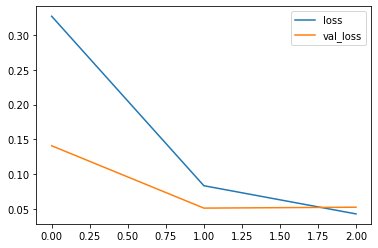

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

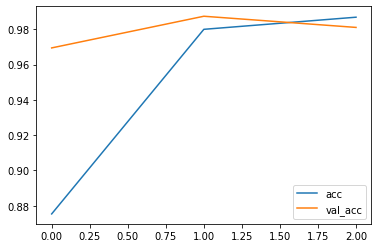

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

The model performs well on the validation set and this configuration is chosen as the final model.


In [ ]:
# Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
# Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 21ms/step - loss: 0.0641 - accuracy: 0.9821


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.064
  Accuracy: 0.982


**Happy Learning**

https://www.kaggle.com/shahules/zomato-complete-eda-and-lstm-model